In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 1000

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    #Collect the data from the html
    response = requests.get(url)

    #parse the content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")
 

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3847 total reviews
Scraping page 5
   ---> 3847 total reviews
Scraping page 6
   ---> 3847 total reviews
Scraping page 7
   ---> 3847 total reviews
Scraping page 8
   ---> 3847 total reviews
Scraping page 9
   ---> 3847 total reviews
Scraping page 10
   ---> 3847 total reviews


In [3]:
df = pd.DataFrame()
df['Reviews'] = reviews
df.head()

,Reviews
0,Not Verified | Delayed flight 1 hour. Arbitrar...
1,Not Verified | Flown with BA four times. As an...
2,✅ Trip Verified | You may never see your ref...
3,Not Verified | Cargo service: that's how I fel...
4,✅ Trip Verified | Inefficient and slow airport...


In [4]:
df.to_csv("BA_reviews.csv")

In [5]:
csv = "BA_reviews.csv"
df1 = pd.read_csv(csv)
df1.head

<bound method NDFrame.head of       Unnamed: 0                                            Reviews
0              0  Not Verified | Delayed flight 1 hour. Arbitrar...
1              1  Not Verified | Flown with BA four times. As an...
2              2  ✅ Trip Verified |   You may never see your ref...
3              3  Not Verified | Cargo service: that's how I fel...
4              4  ✅ Trip Verified | Inefficient and slow airport...
...          ...                                                ...
3842        3842  Flew LHR - VIE return operated by bmi but BA a...
3843        3843  LHR to HAM. Purser addresses all club passenge...
3844        3844  My son who had worked for British Airways urge...
3845        3845  London City-New York JFK via Shannon on A318 b...
3846        3846  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3847 rows x 2 columns]>

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3847 non-null   int64 
 1   Reviews     3847 non-null   object
dtypes: int64(1), object(1)
memory usage: 60.2+ KB


In [7]:
df1.describe()

,Unnamed: 0
count,3847.000000
mean,1923.000000
std,1110.677571
min,0.000000
25%,961.500000
50%,1923.000000
75%,2884.500000
max,3846.000000


In [8]:
df1['Reviews'] = df1['Reviews'].str.strip()
df1['Reviews'] = df1['Reviews'].str.lstrip('✅ Trip Verified |')
df1['Reviews'] = df1['Reviews'].str.lstrip('Not Verified |')
df1['Reviews'] = df1['Reviews'].str.lower()
print(df1)


      Unnamed: 0                                            Reviews
0              0  delayed flight 1 hour. arbitrary cancellation ...
1              1  flown with ba four times. as an anxious travel...
2              2  you may never see your refund. i cancelled my ...
3              3  cargo service: that's how i felt in the a380 u...
4              4  inefficient and slow airport operation. restin...
...          ...                                                ...
3842        3842  flew lhr - vie return operated by bmi but ba a...
3843        3843  lhr to ham. purser addresses all club passenge...
3844        3844  my son who had worked for british airways urge...
3845        3845  london city-new york jfk via shannon on a318 b...
3846        3846  sin-lhr ba12 b747-436 first class. old aircraf...

[3847 rows x 2 columns]


In [9]:
#Removing the puntuation
df1['Reviews'] = df1['Reviews'].str.replace('[^\w\s]','')
print(df1)

      Unnamed: 0                                            Reviews
0              0  delayed flight 1 hour. arbitrary cancellation ...
1              1  flown with ba four times. as an anxious travel...
2              2  you may never see your refund. i cancelled my ...
3              3  cargo service: that's how i felt in the a380 u...
4              4  inefficient and slow airport operation. restin...
...          ...                                                ...
3842        3842  flew lhr - vie return operated by bmi but ba a...
3843        3843  lhr to ham. purser addresses all club passenge...
3844        3844  my son who had worked for british airways urge...
3845        3845  london city-new york jfk via shannon on a318 b...
3846        3846  sin-lhr ba12 b747-436 first class. old aircraf...

[3847 rows x 2 columns]


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\SUMAN\AppData\Local\Temp\ipykernel_11780\2906356138.py:2: SyntaxWarning: invalid escape sequence '\w'
  df1['Reviews'] = df1['Reviews'].str.replace('[^\w\s]','')


In [10]:
#tokenization
print(df1.iloc[1,1])
df1['Reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['Reviews']), axis=1)
print(df1.iloc[0,1])

flown with ba four times. as an anxious traveller i can’t recommend them enough. constant updates from the pilot if there are delays and the cabin crew are brilliant every time. will always use ba in the future.
['delayed', 'flight', '1', 'hour', '.', 'arbitrary', 'cancellation', 'of', 'paid', 'for', 'reserved', 'seats', '-', 'no', 'response', 'to', 'formal', 'complaint', 'or', 'explanation', '.', 'flight', 'back', 'to', 'london', 'cancelled', 'giving', '3', 'days', 'notice', '.', 'no', 'reason', 'given', '.', 'alternative', 'flight', 'offered', 'two', 'days', 'later', '.', 'travelling', 'with', 'son', 'and', 'daughter', '.']


In [11]:
#Removing the stopwords
df1['Reviews'] = df1['Reviews'].apply(lambda x:' '.join([word for word in x if word not in (stopwords)]))
print(df1)

      Unnamed: 0                                            Reviews
0              0  delayed flight 1 hour . arbitrary cancellation...
1              1  flown ba four times . anxious traveller ’ reco...
2              2  may never see refund . cancelled return flight...
3              3  cargo service : 's felt a380 upper deck ( supp...
4              4  inefficient slow airport operation . resting l...
...          ...                                                ...
3842        3842  flew lhr - vie return operated bmi ba aircraft...
3843        3843  lhr ham . purser addresses club passengers nam...
3844        3844  son worked british airways urged fly british a...
3845        3845  london city-new york jfk via shannon a318 real...
3846        3846  sin-lhr ba12 b747-436 first class . old aircra...

[3847 rows x 2 columns]


In [13]:
#Checking the sentiment of the data
from textblob import TextBlob
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
def tag_cal(num):
    if num<0:
        return 'Negetive'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
    
df1['polarity'] = df1['Reviews'].apply(polarity)
df1['tag'] = df1['polarity'].apply(tag_cal)

In [14]:
print(df1)

      Unnamed: 0                                            Reviews  polarity  \
0              0  delayed flight 1 hour . arbitrary cancellation... -0.100000   
1              1  flown ba four times . anxious traveller ’ reco...  0.130000   
2              2  may never see refund . cancelled return flight... -0.083333   
3              3  cargo service : 's felt a380 upper deck ( supp...  0.064251   
4              4  inefficient slow airport operation . resting l... -0.119643   
...          ...                                                ...       ...   
3842        3842  flew lhr - vie return operated bmi ba aircraft...  0.368087   
3843        3843  lhr ham . purser addresses club passengers nam...  0.173214   
3844        3844  son worked british airways urged fly british a...  0.113542   
3845        3845  london city-new york jfk via shannon a318 real...  0.340000   
3846        3846  sin-lhr ba12 b747-436 first class . old aircra... -0.003221   

           tag  
0     Nege

In [15]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negetive    29.321549
Neutral      0.701846
Positive    69.976605
dtype: float64

In [16]:
from wordcloud import WordCloud

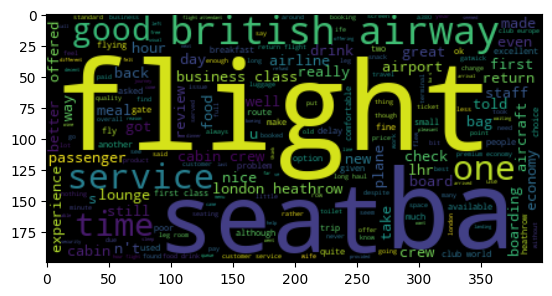

In [17]:
text = ' '
for ind in df1.index:
    if df1['tag'][ind] == 'Positive':
        text = text + df1['Reviews'][ind]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')


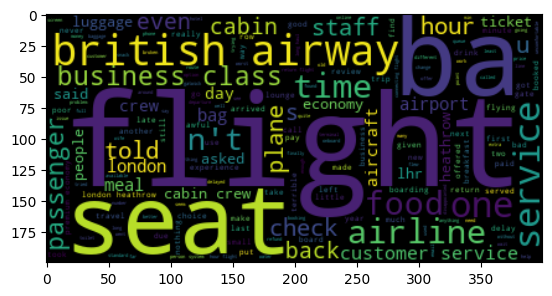

In [18]:
text = ' '
for ind in df1.index:
    if df1['tag'][ind] == 'Negetive':
        text = text + df1['Reviews'][ind]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')


Text(0.5, 1.0, 'Sentiment Count')

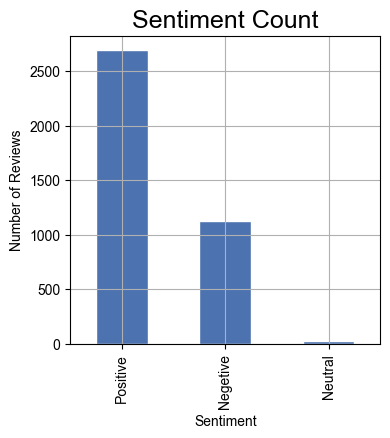

In [19]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.5)
df1['tag'].value_counts().plot(kind='bar',figsize=(4,4))
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Count')

# Task-2 : Building a machine learning model

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [24]:
data = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [26]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [27]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [33]:
data['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [35]:
# Lets map the days in a numeric format
data['flight_day'] = data['flight_day'].map({'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7})

In [39]:
data['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [40]:
data['trip_type'] = data['trip_type'].map({'RoundTrip':1,'CircleTrip':2,'OneWay':3})

In [41]:
data['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [42]:
data['sales_channel'] = data['sales_channel'].map({'Internet':1,'Mobile':2})

Creating a dictionary to map unique strings to numerical values for the origin

In [43]:
book_map =  dict(zip(data['booking_origin'].unique(), range(len(data['booking_origin'].unique()))))

#Now let's convert the string in the array to numerical values using the dictionary

data['booking_origin'] =  data['booking_origin'].apply(lambda x: book_map[x])

In [46]:
#Number of unique items 

data['route'].nunique()

799

Creating a dict to map unique strings to numerical values for the 'route' variable

In [48]:
route_map = dict(zip(data['route'].unique(), range(len(data['route'].unique()))))

#Now let's convert the string in the array to numerical values using the dictionary
data['route'] = data['route'].apply(lambda x: route_map[x])

In [49]:
data['route']

0          0
1          0
2          0
3          0
4          0
        ... 
49995    638
49996    638
49997    638
49998    638
49999    638
Name: route, Length: 50000, dtype: int64

In [50]:
len(data['route'])

50000

In [55]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [57]:
data['purchase_lead'].nunique()

470

# Using MinMaxScaler to tranform the features in the range of 0 and 1

In [58]:
scaler = MinMaxScaler()
purchase_lead_scale = scaler.fit_transform(data[['purchase_lead']])

In [59]:
data['purchase_lead'] = np.array(purchase_lead_scale).flatten()

In [63]:
length_stay_scale = scaler.fit_transform(data[['length_of_stay']])

flight_hour_scale = scaler.fit_transform(data[['flight_hour']])

In [64]:
data['length_of_stay'] = np.array(length_stay_scale).flatten()
data['flight_hour'] = np.array(flight_hour_scale).flatten()

In [65]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,0.302191,0.024422,0.304348,NaN,0,0,1,0,0,5.52,0
1,1,1,1,0.129181,0.025707,0.130435,NaN,0,0,0,0,0,5.52,0
2,2,1,1,0.280277,0.028278,0.739130,NaN,0,1,1,1,0,5.52,0
3,1,1,1,0.110727,0.039846,0.173913,NaN,0,0,0,0,1,5.52,0
4,2,1,1,0.078431,0.028278,0.652174,NaN,0,1,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,0.031142,0.007712,0.391304,NaN,638,36,1,0,1,5.62,0
49996,1,1,1,0.128028,0.007712,0.173913,NaN,638,36,0,0,0,5.62,0
49997,1,1,1,0.027682,0.007712,0.956522,NaN,638,36,0,0,1,5.62,0
49998,1,1,1,0.017301,0.007712,0.478261,NaN,638,36,1,0,1,5.62,0


Random forest classification

In [66]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Dividing the features into X and y label

In [67]:
X = data.drop('booking_complete',axis=1)
y = data['booking_complete']

Spliting the data into train and test datasets

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
model = RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8545

In [70]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
model.feature_importances_

array([0.05332543, 0.01169391, 0.00179409, 0.22601911, 0.13921808,
       0.16054506, 0.        , 0.16356538, 0.11368716, 0.01523638,
       0.0168408 , 0.02208735, 0.07598725])

In [72]:
y_pred = pd.DataFrame(y_predict)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [73]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[8359,  161],
       [1294,  186]], dtype=int64)

Text(23.75, 0.5, 'Truth')

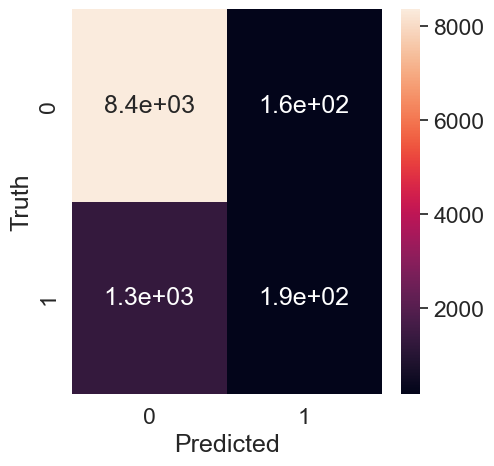

In [74]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy Score

In [75]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score is",acc_score)

The accuracy score is 0.8545


Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(model, X_train,y_train, cv=5)
print("Cross validation score is",cross_score)

Cross validation score is [0.849    0.8505   0.847625 0.846375 0.8555  ]


Classification Report

In [77]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.87      0.98      0.92      8520\n           1       0.54      0.13      0.20      1480\n\n    accuracy                           0.85     10000\n   macro avg       0.70      0.55      0.56     10000\nweighted avg       0.82      0.85      0.81     10000\n'

Let's convert the report into a proper dataframe for visualization

In [79]:
rep_dict = classification_report(y_pred,y_test, output_dict=True)
data1 = pd.DataFrame(rep_dict)
data1

,0,1,accuracy,macro avg,weighted avg
precision,0.981103,0.125676,0.8545,0.553389,0.95142
recall,0.865948,0.536023,0.8545,0.700986,0.85450
f1-score,0.919936,0.203612,0.8545,0.561774,0.89508
support,9653.000000,347.000000,0.8545,10000.000000,10000.00000


Visualization

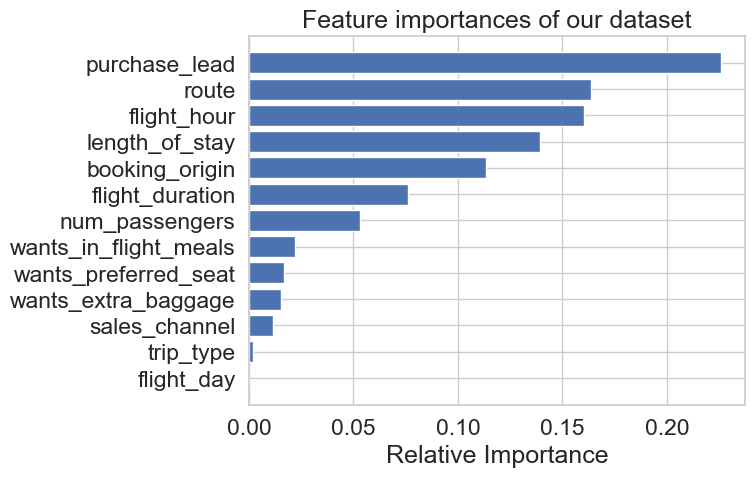

In [88]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title("Feature importances of our dataset")
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

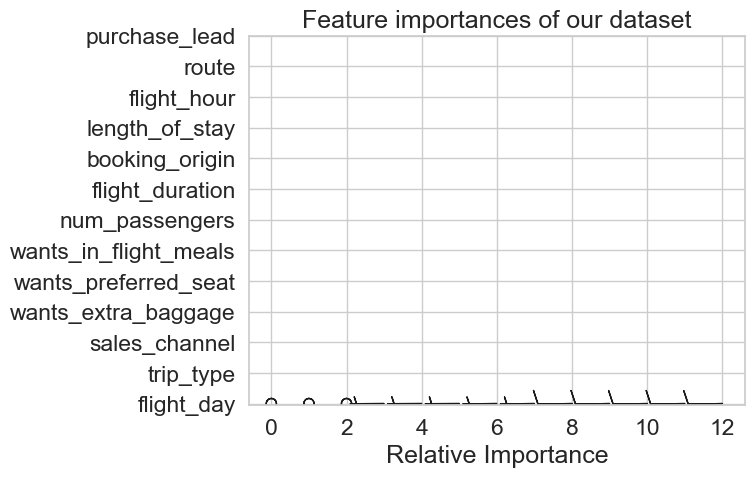

In [101]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title("Feature importances of our dataset")
plt.barbs(range(len(importances)), importances[indices])
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()